## Feature Importance

Utilicemos Random Forest para ver la importancia de los features  
Importamos lo necesario para correr Random Forest

In [55]:
# Para ver los parametros que se utilizan
from pprint import pprint
import pickle

Usando XGBOOST

In [56]:
#Se obtiene de correr con XGBoost todos los features y max depth 10
filename = 'modelos/xgb_modelo_inicial.sav'

In [57]:
loaded_model = pickle.load(open(filename, 'rb'))

In [59]:
feature_important = loaded_model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())
data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=True)

El modelo se entreno con todos los features y get_dummies

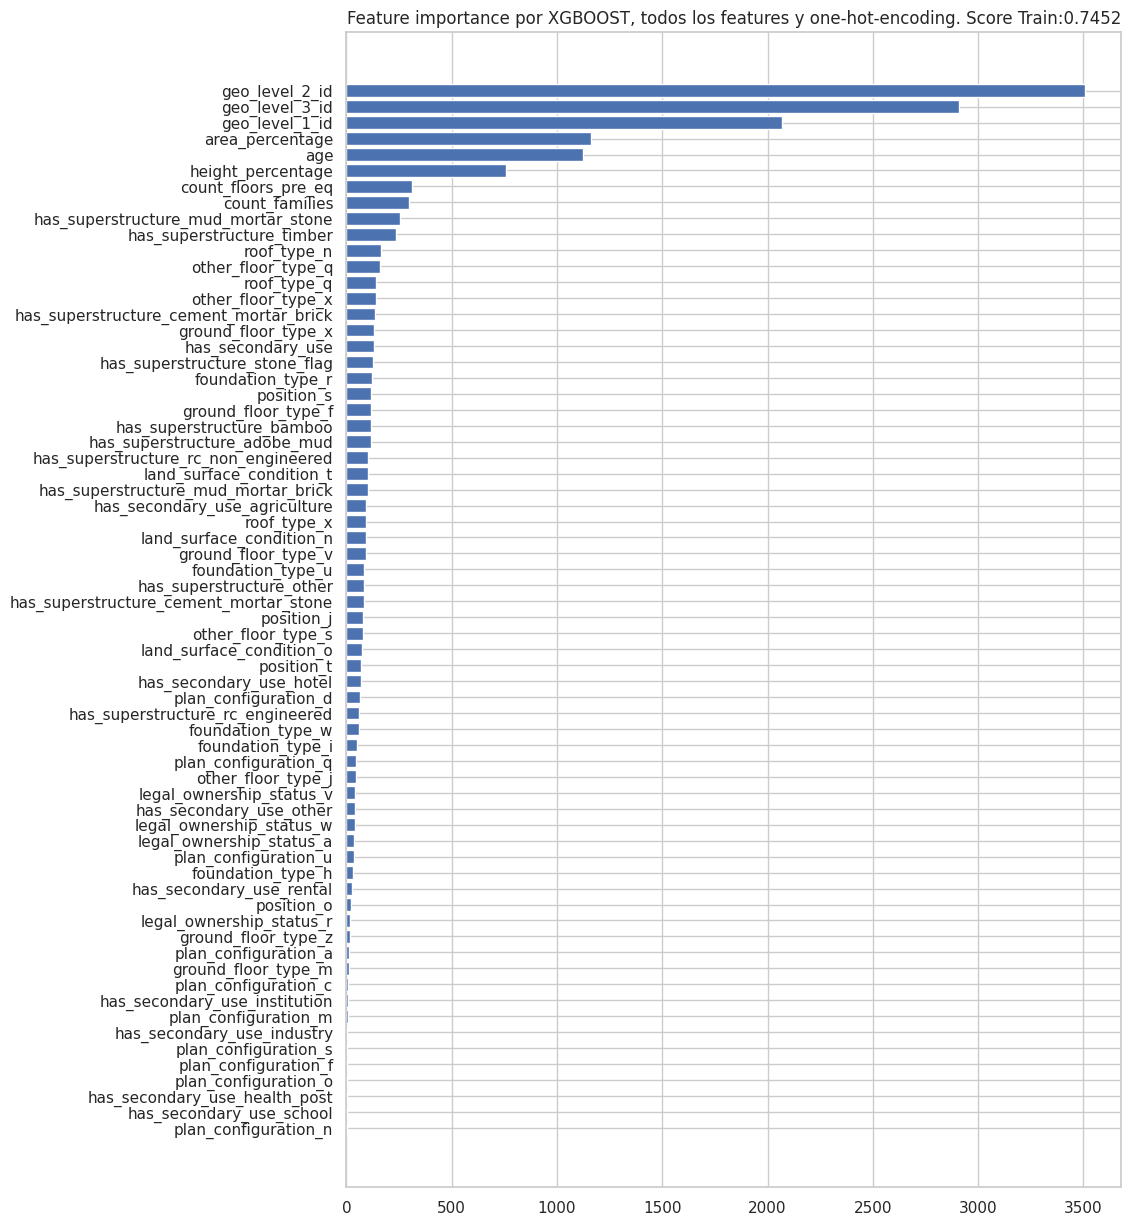

In [12]:
#Grafico de feature importance
fig, ax = plt.subplots(figsize=(10,15))
ax.barh(data.index,data['score'].values)
ax.set_title('Feature importance por XGBOOST, todos los features y one-hot-encoding. Score Train:0.7452')
plt.show()

## Conclusiones de Feature importance inicial

*  Las variantes has_secondary_use tienen muy poca importancia para XGBoost. Nos podemos quedar solo con la de has_secondary_use a secas.
*  Plan_configuration es el que lo sigue en menor importancia para el algoritmo. Considerar una transformación apropiada. "Si está alquilada->la cuidan menos->más deteriorada está->más riesgo de derrumbe ?)"
*  El resto es analizar columna por columna.